### CSE 5243 - Introduction to Data Mining

## Homework 1: CRISP_DM Steps 1-3 (with Exploratory Data Analysis)

Replace the example information below with your real information:

- Semester: Spring 2023
- Instructor: Tom Bihari
- Section Wed/Fri 9:35AM
- Student Name: Richard Zhou
- Student Email: zhou.3153@osu.edu
- Student ID: 500387895

Based on CRISP-DM Template Version V11.


---

# Section: Overview

- Insert a short description of the scope of this exercise, any supporting information, etc.
- **(I will fill this in for each assignment - Tom Bihari)**

---


### Assignment Overview

In this assignment, you will analyze an ALTERED copy of the “Hotel Booking Demand” dataset.

- This dataset was pulled on 4/8/22 from: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand
- The dataset file is named: **hotel_bookings_with_errors_V1.csv**

**The data has been altered slightly for use in course assignments,etc.:**

- A unique ROW attribute has been added.
- Errors have been added, such as: duplicated records, deleted records, deleted attribute values, erroneous attribute values.
  **DO NOT PUBLISH THIS DATASET - it contains intentionally wrong data!**

This assignment covers the **first three of the six steps** of the **CRISP-DM process model** (Business Understanding, Data Understanding, Data Preparation). (See the CRISP-DM materials on CARMEN.)

The **objectives** of this assignment are:

- By analyzing and thinking critically about the data, you may identify interesting charcteristics that would be useful when using the data.
- The final, cleaned-up dataset that you create may be used to build classification / regression models in assignments.

### Problem Statement

Assume that you are the Director of Data Science for Buckeye Resorts, Inc. (BRI), an international hotel chain. As is the case for all hotel chains, reservation cancellations cause significant impacts to BRI, in profitability, logistics, and other areas. The cost to BRI of a cancelled reservation is $500 on average.

- BRI wants to improve (decrease) the cancellation rates at its hotels, using more tailored interventions, based on newly available detailed data. BRI processes 100,000 reservations per year, so an incremental improvement in cancellation rates would have a significant impact.

- One intervention being considered is to offer a special financial incentive to customers who have reservations, but who are “at risk” of cancellation. BRI has performed a small pilot test, and has found that offering a $100 discount to a customer who is planning to cancel is effective 30% of the time in inducing the customer not to cancel (by locking in a “no cancellation” clause).

- BRI leadership has asked your team to analyze the new data, and determine if it is suitable for developing analyses and models that would be effective in predicting which future reservations are likely to be at risk of cancellation, so the aforementioned financial incentive could be offered.

- The head of BRI would then like you attend the upcoming BRI Board of Directors meeting. She has asked you to present your findings to her and to the BOD, to help them decide whether to go forward with the planned tailored intervention approach, and/or to adjust or abandon the approach. Your goal is to support the BOD in making a decision.

You decide to look at the dataset, **explore (understand)** what it contains, and **create (prepare)** a clean dataset from it that contains the kind of information you think might be useful.

You do not yet know the specific algorithm, formula or model you will use to predict cancallations. **That will come in a later step.**

### Things To Do

Complete the sections for the first three steps of CRISP-DM in this notebook. Some intial guidance / sugggestions:

- **Business Understanding**: Fill in the cells, using your thoughts on the specific item. Your answers will not be graded for "correctness", just "thoughtfulness". Feel free to "invent" a narrative for detailed information not provided above. Don't spend a lot of time on it.
- **Data Understanding**: There are many attributes in this dataset. Once you have done some initial analysis, you may choose to concentrate on ones that seem more promising or useful. However, you must give evidence and explain why the attributes that you choose to give less attention warrant the lack of attention.
- **Data Preparation**: Clean up the data and save it for future use.

It is essential that you **communicate** your goals, thought process, actions, results, and conclusions to the **audience** that will consume this work. It is **not enough** to show just the code. It is not appropriate to show long sections of **unexplained printout**, etc. Be kind to your readers and provide value to them!

**ALWAYS follow this pattern** when doing **each portion** of the work. This allows us to give feedback and assign scores, and to give partial credit. Make it easy for the reader to understand your work.

- Say (briefly) **what** you are trying to do, and **why**.
- Do it (code).
- Show or describe the **result** clearly (and briefly as needed), and explain the significant **conclusions or insights** derived from the results.

Based on CRISP-DM Template Version V11.

**HAVE FUN!**


---

# Section: Setup

- Add any needed imports, helper functions, etc., here.

---


In [1]:
import numpy as np
import pandas as pd

#!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.use('Qt5Agg')

import seaborn as sns

pd.set_option('display.max_columns', 50) #include to avoid ... in middle of display

---

# Section: 1 - Business Understanding

- This step is essential (and occasionally ignored…). It focuses on understanding the business needs and objectives, and defining a data analysis problem that is relevant and useful to the business, so the right solution is built.

- Consider the following questions and discuss the possible answers to them in the spaces below.
  - It is OK to say that you do not know. How might you get answers to the questions?
  - You may consider some of the questions to be "not applicable". If so, why?
  - You may choose to use markdown instead of raw text in the answer cells, to make them "pretty" and easy to read.

---


**Context**

- What is the overview, history, big picture?


The overview of the work is to retain customers. We are trying to keep people from cancelling and offering the 100 discount to the customer is better to have them stay than to have them leave. This is more like "cutting out losses"
and getting the most benefit that we can out of the situation. The overall largest picture is to make more money.


**Business Objectives**

- What is the problem or opportunity to be addressed / solved?
- What is its business value?


The problem or opportuniy to be addressed is the retention rate of people cancelling their stays. The business value is that if they cancel, the resort loses money. This is because the time that the cancelling customer
had the reservation other people who would not have cancelled could have had the opportunity to have the reservation. This means that we are losing more money in oppoortunity and amount returned.


**Stakeholders**

- Who are they?
- What are their needs?


The stakeholders are the future customers who will make future reservations. They need to have more incentives not to cancel and to be persuaded to go on the trip that they reserved.
This can be in the form of amenities and monetary


**General Goals**

- Understand the past/current state (descriptive)?
- Predict the future (predictive)?
- Mine for unknown patterns / insights?
- Answer questions? What are they?
- Support decisions? What are they?


The past is where people would cancel and the future holds a lower rate of cancellations using incentives. I predict that in the future with the incentives and other developing ones, the cancellationn rate will decrease.
In the future their will be patterns of a higher retention but this issue may arise again and it is up to the company to be creative in the way that they face it.


**Scope**

- What is the specific scope of the project?
- What, specifically, is NOT in scope? (What are you not doing that someone might think you are doing?)
  Is the scope flexible? In what way?


The scope of the project is 100$ of incentive sin order to have the customer not cancel the trip. The scope is flexible because there are many ways to persuade and it does not have to be monetary. It could also be
a free amenity or an upgrade ata discounted price. The goal is to just keep the customer from cancelling by losing the least amount of money to maximize profit.


**Deliverables**

- Report?
- Reusable code?
- Presentation?


The deliverable will be a report but also in the form of a presentation to demonstrate the trends that are happening to the higher ups and from their, a business decision can be made about whether or not to
pusue th idea more.


**Success Criteria**

- What, specifically, must be accomplished for this project to be a success?


For this project to be considereda success, there must be a decrease in people cancelling their reservations.


**Solution Approach**

- Is this a “one time” (throw away) solution?
- Or will the solution become part of repeated process that is used and enhanced over time?


This is not a one time throw away solution, but it is a temporary one. This is just to see the effects of an incentive on the customer who want to cancel. If we see that there is a positive effect, then the business can decide how the inventive hsould be given accordingly and not just a 100 dollar discount.


**Quality**

- What level of Correctness or Confidence is needed?
- Is this life-critical or are we looking for ‘directionally correct’ results?


We are looking for directionally correct results. This is because it is merely a venture to make more money and do better for the business. The elvel of Confidence needed will need to be high because in order to pursue this idea in the future ,it will hav emore money going into it which means moore money must be coming out.


**Constraints**

- Are there legal / regulatory implications (privacy, security, liability, HIPAA, FERPA)?
- Are there architectural constraints?


There are some slight legal constraints with what the business can use as an incentive.


**Time / Cost**

- What is the deadline or budget?


The deadline will be at the next year. This is because we need to observe not just the everday business but especially when the resort is busy during the holiday and tourist seasons. The budget would be 100$ for each cancelling customer.


**Dependencies**

- Is this project dependent on any other project or activity?
- Is any other project or activity dependent on this project?


This project can stand on its own.


**Resources Needed**

- Do you potentially need access to specific people, data, etc?


I would need access to the sales database and log the trends oof what is happening with the retention.


**Other Considerations**

- What other considerations, not covered above, might be relevant?


I feel like a consideration would need to be the time of when the cancellations are happening. in order to be the most effective, if we can predict when most of this will happen that will help.


---

# Section: 2 - Data Understanding

- Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data. Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the class attribute (if this is a classification problem).
- This step includes:
  - Understanding what data might be available and relevant.
  - Acquiring the data.
  - Understanding the characteristics of the data (e.g., quality, completeness, currency, consistency,…).
  - Understanding how other datasets might enhance or supplement the data (and acquiring that data as well).
  - Possibly performing some initial analysis to build confidence that the overall direction is likely to be helpful to the business problem to be solved.

**NOTE:** Frequently, a first pass is made through the data to fix or remove "obvious" data quality issues (missing values, duplicate records, outliers (some), etc.). The deeper Data Understanding analysis then is done on the "cleaned" data. This mitigates the issue of bad data skewing the data analysis results. **For this example, we will not do this separate first pass.**

---


---

## Section: 2.1 - Describe the meaning and type of data for each attribute.

Identify the type of data for each attribute.

- Categorical: Nominal, Ordinal
- Numerical: Interval, Ratio
- Other: Complex or unstructured data (e.g., text strings, images,...)

NOTES:

- This determines what operations are "meaningful" for each attribute. For example, you can't add two Ordinal attributes.
- You can't always tell the attribute types from the data itself. For example, an Integer attribute could be Ordinal or Interval.

Identify interesting characteristics of the data (e.g., quality, completeness, currency, consistency,…).

- Is this dataset relevant and appropriate for the goals of this project?
  - If not, what could you do? (find other data to replace or supplement this dataset, etc.)

---


### **Examine the meta-data (e.g., from data dictionary) available for the dataset.**


**Discussion:**

Fill in...


### **Load the Dataset.**


In [2]:
#OPTIONAL: Load it only once per session, and save it, so we don't waste time
data_df = pd.read_csv("..\Homework1\hotel_bookings_with_errors_V1.csv")

In [3]:
# Print the schema, based on the data in the file.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119391 entries, 0 to 119390
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ROW                             119391 non-null  int64  
 1   hotel                           119391 non-null  object 
 2   is_canceled                     119390 non-null  float64
 3   lead_time                       119391 non-null  int64  
 4   arrival_date_year               119391 non-null  int64  
 5   arrival_date_month              119391 non-null  object 
 6   arrival_date_week_number        119391 non-null  int64  
 7   arrival_date_day_of_month       119391 non-null  int64  
 8   stays_in_weekend_nights         119391 non-null  int64  
 9   stays_in_week_nights            119391 non-null  int64  
 10  adults                          119391 non-null  int64  
 11  children                        119387 non-null  float64
 12  babies          

**Discussion:**

Fill in...


In [4]:
# Create some simple lists for future use
all_attribute_names = list(data_df)
print(all_attribute_names)
class_attribute_name = 'is_canceled'
nominal_attribute_names = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']
ordinal_attribute_names = []
categorical_attribute_names = nominal_attribute_names + ordinal_attribute_names
interval_attribute_names = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled']
ratio_attribute_names = ['adults', 'children', 'babies', 'booking_changes', 'days_in_waiting_list']
numerical_attribute_names = interval_attribute_names + ratio_attribute_names

['ROW', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


---

## Section: 2.2 - Provide basic statistics for the attributes.

- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.

---


In [5]:
data_df.describe()

,ROW,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119391.000000,119390.000000,119391.000000,119391.000000,119391.000000,119391.000000,119391.000000,119391.000000,119391.000000,119387.000000,119391.000000,119391.000000,119391.000000,119391.000000,119391.000000,103051.00000,6797.000000,119391.000000,119391.000000,119391.000000,119391.000000
mean,59694.000050,0.370408,104.010662,2016.156544,27.165172,15.798117,0.927591,2.500297,1.856572,0.103889,0.007949,0.031912,0.087117,0.137096,0.221122,86.69487,189.266735,2.321130,101.831089,0.062517,0.571366
std,34465.357245,0.482916,106.862967,0.707481,13.605081,8.780897,0.998613,1.908278,0.582185,0.398560,0.097436,0.175766,0.844333,1.497431,0.652303,110.77504,131.655015,17.594648,50.535580,0.245290,0.792796
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,29846.500000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,59694.000000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.00000,179.000000,0.000000,94.590000,0.000000,0.000000
75%,89541.500000,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.00000,270.000000,0.000000,126.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.00000,543.000000,391.000000,5400.000000,8.000000,5.000000


**Discussion:**

Fill in...


Some things that could be wrong are that there are missing values andthat maybe people put dates that are not actually dates within the month


---

## Section: 2.3 - Visualize / analyze the most important or interesting attributes using appropriate techniques.

- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?

---


The visualization that I did shows all of the categorical elements of the data. This would include the nominal and ordinal data. This data is appealing because it shows the rate at which customers tend to cancel and also demonstrates trends for the company to see if there are positive and negative trends. Also the company can greater understand their role to the customer. For example, most of the customers are from PRT and about 44000 are cancelled. It is good to see basic trends quickly.


In [6]:
print("Total Records:", data_df.shape[0], "- Value Counts per Categorical Attribute:\n")
for att in categorical_attribute_names:
    print(data_df[att].value_counts(normalize = False, sort = True, ascending = False, bins = None, dropna = False))
    print("\n")

Total Records: 119391 - Value Counts per Categorical Attribute:

City Hotel      79330
Resort Hotel    40061
Name: hotel, dtype: int64


August       13877
July         12662
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64


BB           92311
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64


PRT    48590
GBR    12130
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64


Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Onlin TA             1
Name: market_segment, dtype: int64


TA/TO        97871
Direct       14645
Corp

**Discussion:**

Fill in...


There are some Nan values like in the is_cancelled,agent, and company columns
In the market segment section there is a typo with Onlin TA which should be Online
There are 5 undefined distributino channels which could be an accident
There might be missing rooms because the alphabet goes from A-P and is missing J,M,N,O


---

## Section: 2.4 - Verify data quality: explain any missing values, duplicate data, or outliers.

- What, if anything, do you need to do about these? Be specific.

---


**Missing Attribute Values**


In [7]:
# Count the missing values for the entire dataframe.
na_df = data_df[data_df.isna().any(axis=1)]
num_records_with_na = na_df.shape[0]
num_na_values = na_df.isna().sum().sum()

print("Total Records:", data_df.shape[0], "- Number of Records with NA:", num_records_with_na, "- Number of NA Values:", num_na_values)
na_df.head(10)

# Show the missing values for each attribute.
print("NA Values per Attribute:")
for att in all_attribute_names:
    num_na = na_df[att].isna().sum()
    if num_na > 0:
        print(att,na_df[att].isna().sum())

Total Records: 119391 - Number of Records with NA: 119174 - Number of NA Values: 129427
NA Values per Attribute:
is_canceled 1
children 4
country 488
agent 16340
company 112594


Regarding these values, the company would need to first find the is_cancelled because this brings ambiguity to whether or not the customer is or is not cancelled and does not allow for the company to address accordingly. This would also effect how successful the project is because the project is based off of whether people cancel or not.

Regarding the children column the company should reach to understand how many people are being housed in those rooms to accomodate.

The country is not needed but is a good resource to have to understand the customers background. (EDIT)

The agents and company's columns could be null because those customers could have booked by themselves off of the websiite and not off another company or third party.


**Duplicate Records**


In [8]:
# Find duplicate records across all attributes.
dup_df = data_df[data_df.duplicated()]
num_dup_records = dup_df.shape[0]

print("Number of duplicate records across all attributes:", num_dup_records)
dup_df.head(10)

Number of duplicate records across all attributes: 1


,ROW,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
6,5,Resort Hotel,0.0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


We can see there is one duplicate row which we will get ride of this row.


**Outliers**


In [9]:
# This is a simple filter that uses 1.5 x the Inter-Quantile Range.
# See: https://stackoverflow.com/questions/69248118/detect-outliers-across-all-columns-of-pandas-dataframe
def find_outliers(df_in, att_name):
    quantile_low  = 0.25  # These are typical values, but you can set them as apropriate - see literature
    quantile_high = 0.75
    multiplier = 1.5
    
    Q1 = df_in[att_name].quantile(int(quantile_low))
    Q3 = df_in[att_name].quantile(float(quantile_high))
    IQR = float(Q3)-float(Q1)
    good_range_low  = Q1 - multiplier * IQR
    good_range_high = Q3 + multiplier * IQR
    
    outlier_list=((df_in[att_name] <= good_range_low) | (df_in[att_name] >= good_range_high)).tolist()
    outlier_indices=[i for i, x in enumerate(outlier_list) if x]

    if len(outlier_indices) > 0:
        outlier_value_list = []
        for i in outlier_indices:
            outlier_value_list.append( [i, df_in.iloc[i][att_name]] )
            
        from operator import itemgetter
        outlier_value_list = sorted(outlier_value_list, key=itemgetter(1), reverse=True)
        
        print("\nAttribute: [", att_name, "]   Good Range: [",good_range_low, ",", good_range_high, "]   Number of Outliers: [", len(outlier_indices),"]")
        print("Index           Value")
        for i in outlier_value_list:
            print("%5d      %10.3f" % (i[0], i[1]))

        plt.figure(figsize=(10,1))
        sns.boxplot(x=att_name, data=df_in)
        plt.show()
    
    return outlier_indices

In [10]:
#outlier_indices = []
#for att in numerical_attribute_names:
#    outlier_indices = find_outliers(data_df, att)
#    outlier_indices.extend(outlier_indices)
#print(f"All Outlier Indices: {outlier_indices}")

The oulier data is inconsistent with some of the attributes because they have a majority of 0 which means that the 1st and 3rd quartiles will all be 0 with the weights shifting towards that value.

add Suggest changes for the heavy weight on 0s

Explain outlers

**Discussion:**

Fill in...


---

## Section: 2.5 - Explore the relationships among the attributes.

- You may include or exclude the class attribute as appropriate.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
- There are three general cases for 2-attribute relationships:
  - Categorical vs Categorical
  - Categorical vs Numerical
  - Numerical vs Numerical

---


**Catergorical Attirbute vs Categorical Attirbute**


Maybe use a histogram?

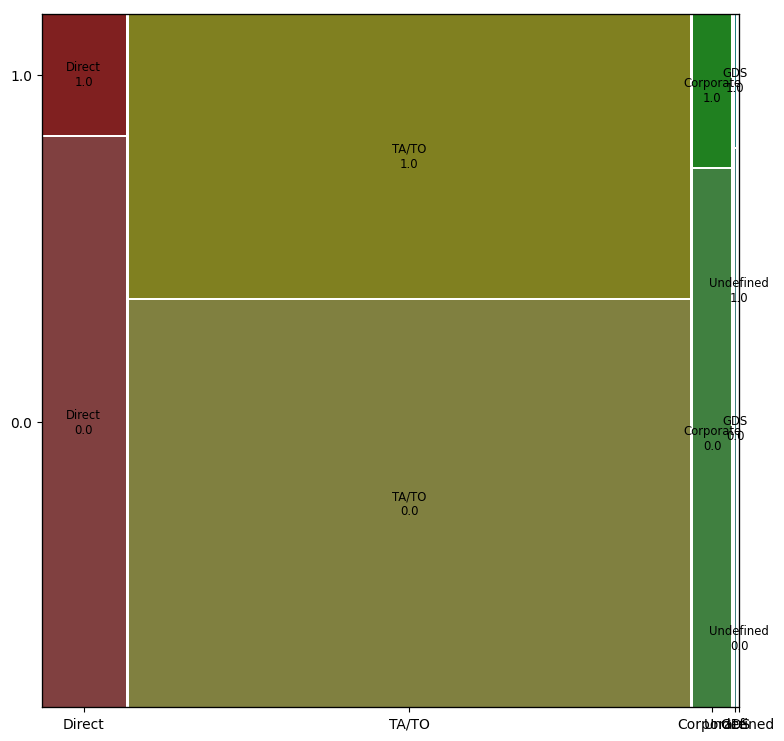

In [11]:
# EXAMPLE: Visualize the relationship between two specific categorical variables.
from statsmodels.graphics.mosaicplot import mosaic

plt.rcParams['font.size'] = 10.0
plt.rcParams["figure.figsize"]=(9,9)
mosaic(data_df.sort_values(by='is_canceled', ascending=True), ['distribution_channel', 'is_canceled'], title='')
plt.show()

This plot shows which ution channel has the higher or lower cancellation rate and we can see that the direct channel has a higher cancellation rate than the TA/TO


**Categorical vs Numerical Attribute**


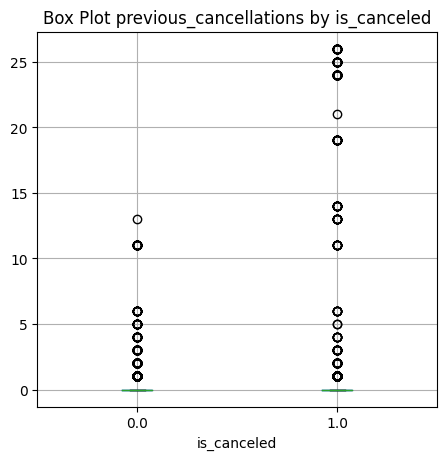

In [12]:
# EXAMPLE: Visualize the relationship between a specific categorical variable and a specific numerical variable.
#   (Violin plots work nicely too.)
plt.rcParams["figure.figsize"]=(5,5)
ax = data_df.boxplot('previous_cancellations', by='is_canceled')
ax.get_figure().suptitle(t="")
plt.title("Box Plot previous_cancellations by is_canceled")
plt.show()

We can see in this relation here that poeple with more cancellations have more of a tendency to cancel again for the year we are examining.


In [13]:
# Visualize the relationship between all pairs of numerical variables, to look for potential relationships.
#sns.pairplot(data = data_df[numerical_attribute_names+[class_attribute_name]], hue=class_attribute_name, height=3)
#plt.show()

Here we can see relationships between each numerical attribute and the class attribute of is_canceled. What we can see is that the largest pattern is when people havd a pattern of cancelling or not cancelling. We can see every attribute and the realtionship it has with the is_cancelled class attribute.
On top of this, seeing the relationship between all of the variales help to find patterns that calculations cannot see.

In [14]:
# Compute ANOVA for a specific categorical and numerical variable pair.
# Note: You also can use the t-test if there are only two values for the categorical variable.
def anova_test(data_frame, categorical_variable, numerical_variable, alpha):
    # See: https://towardsdatascience.com/statistics-in-python-using-anova-for-feature-selection-b4dc876ef4f0
    # Calculate the f-value using the statsmodel module. 
    # You first build the model using the ols() function, and then call the fit() function on the instance of the model.
    # Finally, you call the anova_lm() function on the fitted model and specify the type of ANOVA test to perform on it:
    #   There are 3 types of ANOVA tests to perform, but their discussion is beyond the scope of this discussion.
    # Note: Hypothesis H0 = There is NO significant influence of the categorical variable on the numerical variable.
    import statsmodels.api as sm
    from statsmodels.formula.api import ols

    param_string = numerical_variable + " ~ " + categorical_variable
    model = ols(param_string, data=data_frame).fit()
    result = sm.stats.anova_lm(model, typ=2)
    #print(result)

    p_value = result.iat[0, 3]
    reject_h0 = (p_value < alpha)
    return p_value, reject_h0

In [15]:
# Compute ANOVA for the categorical attribute "species" and each numerical attribute.
# Note: Hypothesis H0 = There is NO significant influence of the categorical attribute on the numerical attribute.
alpha = 0.05  # Chosen by the data analyst, based on the business problem.
cat_att = "is_canceled"

print("   P_Value             Reject_H0        Cat_Attribute        Num_Attribute")
for num_att in numerical_attribute_names:
    p_value, reject_h0 = anova_test(data_df, cat_att, num_att, alpha)
    print("%10.6g  %20s %20s %20s" % (p_value, reject_h0, cat_att, num_att))

   P_Value             Reject_H0        Cat_Attribute        Num_Attribute
         0                  True          is_canceled            lead_time
8.08757e-09                  True          is_canceled    arrival_date_year
0.00487025                  True          is_canceled arrival_date_week_number
 0.0350288                  True          is_canceled arrival_date_day_of_month
2.37866e-189                  True          is_canceled    is_repeated_guest
8.66295e-319                  True          is_canceled previous_cancellations
1.50308e-87                  True          is_canceled previous_bookings_not_canceled
4.71247e-94                  True          is_canceled               adults
 0.0808649                 False          is_canceled             children
2.93751e-29                  True          is_canceled               babies
         0                  True          is_canceled      booking_changes
2.46253e-78                  True          is_canceled days_in_waiting_

Here we see the p-value relationships between the numerical varaiables and whether or not the booking is cancelled. As we can see, the variables with the strongest relatinoship are the "is_repeated_guest" and "previous_cancellation" variables.


**Numerical Attribute vs Numerical Attribute**


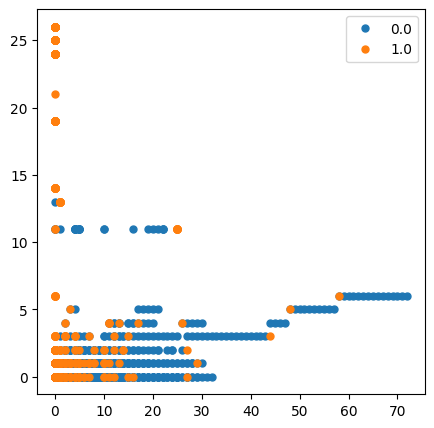

In [16]:
# EXAMPLE: Visualize the relationship between one specific pair of numerical variables, to look for potential relationship.
groups = data_df.groupby('is_canceled')
for name, group in groups:
    plt.plot(group.previous_bookings_not_canceled, group.previous_cancellations, marker='o', linestyle='', markersize=5, label=name)

plt.legend()

Here we see code about comparing the "previous_bookings_not_canceled" and the "previous_cancellations". We see an inverse relationship regarding the blue and the orange here which makes sense because the two actions are opposites.


<AxesSubplot: >

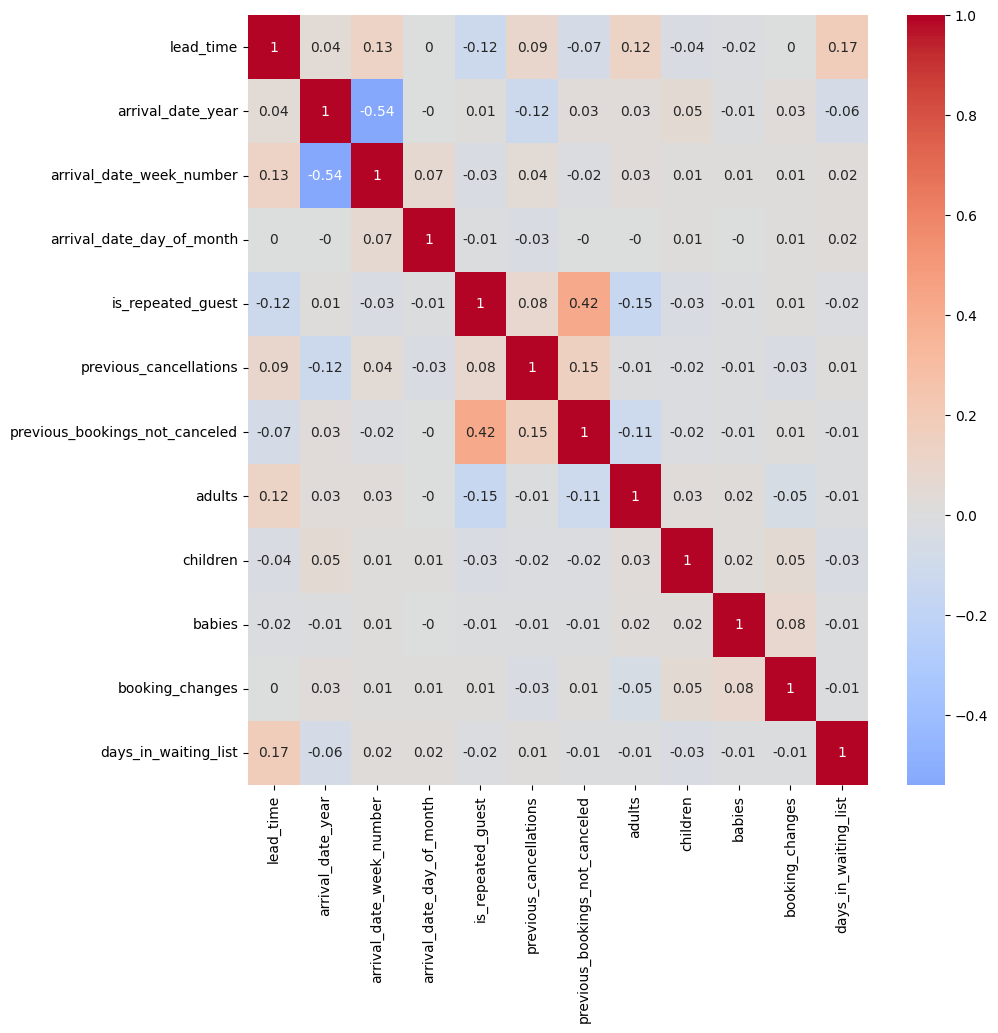

In [17]:
# Compute all of the (Pearson) *linear* correlations between pairs of numerical variables and display a heatmap.
# Note: You also could compute Spearman's Rank correlation (which can capture non-linear relationships).
#   See: https://www.statology.org/spearman-correlation-python/

cor = data_df[numerical_attribute_names].corr(method='pearson').round(2)
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True, center=0.0, cmap='coolwarm')

Here we see the largest positive correlation being a repeated guest and not many previous cancellations which shows they generally will not cancel and the most negative correlation beingthe arrival date week and the year which means that there must have been a national event on that day to cause mass cancellations. On top of this we also see a positive correlatoin in the lead time and the days in the waiting list.

**Discussion:**

Fill in...


---

## Section: 2.6 - Identify and explain any interesting relationships between the class attribute and the other attributes.

- You may refer to earlier analyses / visualizations (if you included the class attribute above) or create new ones.

---


The class attribute is is_cancelled. You can see in most of all the plots above but especially in the graph comparing previous cancellations and is canceled. This variable also whether or not if they are a returning guest or not have a large effect on cancellations. On top of this, the p-value chart shows the same conclusion. Most of all the charts shown above show that the largest effectors are the previous_bookings_not_cancelled and the returning_customer.


More explanation

**Discussion:**

Fill in...


---

# Section: 3 - Data Preparation

In this step, the “final” target dataset is constructed (although nothing is ever final…), based on the insights gleaned in the Data Understanding step.
This may include:

- Normalizing / standardizing the data.
- Handling missing and erroneous data.
- Transforming or eliminating attributes.
- “Blending” data from multiple sources (with attention to consistency of the various sources).
- Deploying the data to storage in suitable formats, data models / structures.

**NOTE:** In each of these sections, it is OK to decide to **not** make changes to the dataset, but you **must** explain **why** you made the choice. Recall that the purpose of this step is to produce a clean dataset that is suitable for the intended purposes. So, for example, you might choose to not remove any attributes, but if you have 100 apparently irrelevant attributes, explain why are you keeping them - there may be a good reason.

---


---

## Section: 3.1 - Clean the Data

- Implement any data cleaning steps previously identified. Please justify.
- Show the effects of that cleaning through the use of appropriate statistics and/or visualizations.

---


In [18]:
# Create a copy of the dataset for cleaning
clean_data_df = data_df.copy()

**Revise the Data**


I am cleaning the typo with onlin TA to Online TA


In [19]:
clean_data_df['company'] = clean_data_df['company'].replace(to_replace='Onlin TA', value='Online TA')

In [20]:
clean_data_df['is_canceled'] = clean_data_df['is_canceled'].fillna(0)
print(clean_data_df['is_canceled'].isnull().sum())

0


I am removing the row with a duplicte in it

In [21]:
clean_data_df.drop(5,inplace=True)

**Discussion:**

Fill in...


---

## Section: 3.2 - Select Attributes

- Optionally, remove attributes that are unneeded, redundant, etc., for the expected uses.
- Which attributes did you decide to remove, if any? Please justify.

---


meal and distribution_channel are the arrributes that I feel are needed to remove. This is because with meals, those do not matter as much about what the guest needs and what can help with cancellations. They are irrelavant. I feel like the distribution and the market segment have the same values in them. This would make the distribution channel redundant and not needed.

**Discussion:**

Fill in...


---

## Section: 3.3 - Create Attributes

- Optionally, create new attributes based on the values of other attibutes.
- Which new attributes did you decide to create, if any? Please justify.

---


I did not feel the need to add attributes because I felt that the only attribute really needd were the is cancelled and whether or not the guests had a history of cancelling. On top of that the other attributes were useful for finding other patterns like the day they arrived or how many special accomodations they had. If I was to add another attribute it would probably be a weighted number based off of the correlation and patterns found. The most logical one would be a ratio of adults to children and babies which would give a family ratio factor. This would allow for us to see how a family and the ratio would effect trip cancellations and target our audience accordingly.

In [22]:
clean_data_df['adults'].describe()

count    119390.000000
mean          1.856571
std           0.582187
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

In [23]:
clean_data_df['family_ratio'] = clean_data_df['adults'] / clean_data_df['children']

In [24]:
clean_data_df['family_ratio'].describe()

c:\Users\15202\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    119206.0
mean          inf
std           NaN
min           0.0
25%           NaN
50%           NaN
75%           NaN
max           inf
Name: family_ratio, dtype: float64

Since most families dont have children or babies this would not help that much but in other cases, I thought that this could help narrow a target audience.

---

## Section: 3.4 - Transform Attributes

- Optionally, transform existing attributes (e.g., standardize, normalize, change units of measure, encode) to make them more appropriate for the expected uses.
- Which attributes did you decide to transform, if any? Please justify.

---


I did not see the need to change or transform any of the attributes because they are all simple. The only thing I would change would be for the month to be an integer instead of a string. This would be because it would allow for us to not only see dates and weeks but also narrow down to the specific month and understand the numerical analysis on which months have the busiest travelling and find statistical analysis on a month to month basis.

**Discussion:**

Fill in...


---

## Section: 3.5 - Select Records

- Optionally, select a subset of the records, via sampling, etc., to decrease the size of the dataset. Please justify.

---


I feel like there are many columns that are not needed in this dataset for some correlation analysis and that the only ones needed should be related to how often the cancel rate is. This would allow for targeted information and a faster and concise understanding of the data. I omitted many columns that had no influence from the data above on the data set and specifically kept columns which I wished to pursue more analysis in.

In [25]:
clean_data_df.drop(['distribution_channel', 'assigned_room_type','reserved_room_type', 'deposit_type', 'agent', 'adr'], axis = 1)

,ROW,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,family_ratio
0,0,Resort Hotel,0.0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,3,NaN,0,Transient,0,0,Check-Out,7/1/2015,inf
1,1,Resort Hotel,0.0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,4,NaN,0,Transient,0,0,Check-Out,7/1/2015,inf
2,2,Resort Hotel,0.0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,0,0,0,0,NaN,0,Transient,0,0,Check-Out,7/2/2015,inf
3,3,Resort Hotel,0.0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,0,0,0,0,NaN,0,Transient,0,0,Check-Out,7/2/2015,inf
4,4,Resort Hotel,0.0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,0,0,0,0,NaN,0,Transient,0,1,Check-Out,7/3/2015,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119386,119385,City Hotel,0.0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,0,0,0,0,NaN,0,Transient,0,0,Check-Out,9/6/2017,inf
119387,119386,City Hotel,0.0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,0,0,0,0,NaN,0,Transient,0,2,Check-Out,9/7/2017,inf
119388,119387,City Hotel,0.0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,0,0,0,0,NaN,0,Transient,0,4,Check-Out,9/7/2017,inf
119389,119388,City Hotel,0.0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,0,0,0,0,NaN,0,Transient,0,0,Check-Out,9/7/2017,inf


On top of this, I changed the data to have 100 random values which allows me to take a smaller sample of the dataset to take a small screenshot of parts of my data.

In [26]:
clean_data_df.sample(n=100, replace=True, random_state=45)

,ROW,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,family_ratio
6559,6558,Resort Hotel,0.0,273,2016,June,25,17,2,5,2,0.0,0,BB,GBR,Direct,Direct,0,0,0,D,D,0,No Deposit,250.0,NaN,0,Transient-Party,77.64,0,1,Check-Out,6/24/2016,inf
63108,63107,City Hotel,1.0,26,2017,February,5,1,0,2,2,0.0,0,SC,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,80.00,0,1,Canceled,1/12/2017,inf
6013,6012,Resort Hotel,0.0,217,2016,May,21,20,2,6,2,0.0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,E,E,0,No Deposit,40.0,NaN,0,Transient,84.96,0,0,Check-Out,5/28/2016,inf
60961,60960,City Hotel,1.0,8,2016,November,49,27,2,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,7.0,NaN,0,Transient,65.54,0,0,Canceled,11/24/2016,inf
12896,12895,Resort Hotel,1.0,159,2017,July,29,22,2,5,2,0.0,0,HB,ESP,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,212.00,0,0,Canceled,2/16/2017,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50127,50126,City Hotel,1.0,1,2016,April,18,24,1,0,2,1.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,149.00,0,0,Canceled,4/23/2016,2.0
88851,88850,City Hotel,0.0,30,2016,May,20,11,0,2,2,0.0,0,SC,ESP,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,116.10,0,1,Check-Out,5/13/2016,inf
91736,91735,City Hotel,0.0,265,2016,June,26,24,0,2,2,0.0,0,HB,DEU,Offline TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,6.0,NaN,0,Transient-Party,115.00,0,1,Check-Out,6/26/2016,inf
70072,70071,City Hotel,1.0,66,2017,June,23,9,1,2,2,0.0,0,SC,IRL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,140.00,0,1,Canceled,4/7/2017,inf


**Discussion:**

Fill in...


---

## Section: 3.6 - Other Data Preparation

- Optionally, perform other preparation steps (e.g., to optimize storage, retrieval, etc.). Please justify.

---


I do not feel there are other steps needed here.

---

# Section: 4 - Modeling

In this step, the dataset is analyzed and used to create models and/or answer questions relevant to the business. This may include:

- Developing statistical models for describing or predicting business situations.
- Training data mining (e.g., machine learning) algorithms for classification, clustering, association analysis, outlier detection, and other uses.

NOTE: This step is tightly coupled and iterative with the Data Preparation and Evaluation steps.

---


**Logistic Regression**

I will be taking a logistic regression including the data from is_repeated_guest, previous_cancellations, previous_bookings_not_cancelled, and days_on_waiting_list. I use a logistic regression model because this model will see if it can help predict if a customer will be cancelling or not and we will see this in the final stats with accuracy and precision. 

In [27]:
features = ['is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','days_in_waiting_list']

X = clean_data_df[features]
y = clean_data_df['is_canceled']
print(y.isnull().sum())


0


This is where I split my data to be 75% used for model training and 25% of the data given will be used for model testing.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [29]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [30]:
logreg = confusion_matrix(y_test, y_pred)
print(logreg)
rf_accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(rf_accuracy, 2)) + ' %.')

NameError: name 'confusion_matrix' is not defined

Here the confusion matrix is shown we have 18677 true positive predicitons, 85 type 1 errors, 9641 type 2 errors, and 1445 true negatives. Next I will use a heat map to demonstrate my confusion matrix.

Text(0.5, 445.55555555555554, 'Predicted label')

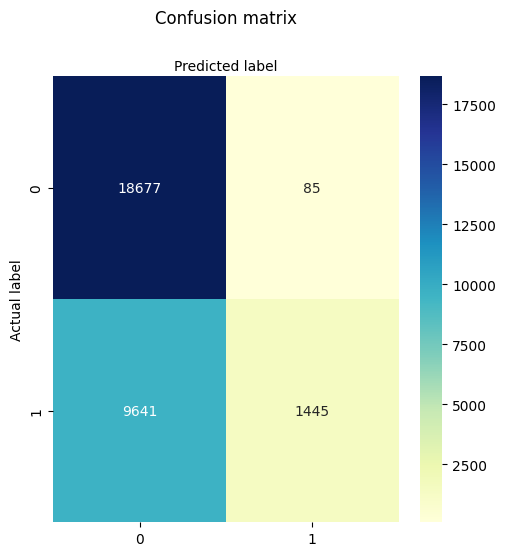

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
target_names = ['is canceled', 'is not canceled']
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    is canceled       0.66      1.00      0.79     18762
is not canceled       0.94      0.13      0.23     11086

       accuracy                           0.67     29848
      macro avg       0.80      0.56      0.51     29848
   weighted avg       0.77      0.67      0.58     29848



Here we see the statistics on how our model performed and we can see it was 67% accurate.

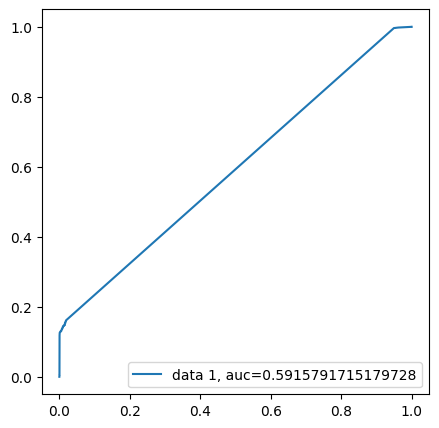

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

This is an ROC curve which pits our true positive to false positive and determines how accurate the model is based off those numbers.

**Discussion:**

Fill in...


---

# Section: 5 - Evaluation

In this step, the analyses and/or models are evaluated for quality and relevance / usefulness.

NOTE: This step is tightly coupled and iterative with the Modeling step.

---


So from what we can tell with the moel from above, it can predict with an accuracy of 67% which is not that great but from that it can recall from the training data if the guest was going to cancel or not. This model is a just a framework for what can be used to help with the prediction of our guests but so far it is loking bright. On top of that, it was extrememly precise in determining whether or not a guest will not cancel. Lastly, we see that the ROC curve which is the true positive rate against the fales positive rate is 59%. This is not the best number but what we could use to help is find more features to allow for a tighter model with more requirments which could allow for us to be more accurate. I would say that the model is relavent but not as practical and useful. This is because the accuracy is relatively low for an industry to use successfully and have the right conversion rate to make the project worth it. 

**Discussion:**

Fill in...


---

# Section: 6 - Deployment

In this step, data and resulting models and/or analyses are put to use. This may include:

- Deploying data mining / machine learning algorithms to production.
- Communicating the results of the analyses to business stakeholders, so they can take action.

---


**Discussion:**

Fill in...


---

# Section: Conclusions

- What did you learn from this exercise?

---


**Discussion:**

Fill in...
